In [74]:
# importing the required libraries
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow import keras
import tensorflow as tf

In [105]:
# Reading the dataset
df = pd.read_csv('../data/deep_learning_task_dataset.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5000 non-null   object 
 1   Item_Weight                4182 non-null   float64
 2   Item_Fat_Content           5000 non-null   object 
 3   Item_Visibility            5000 non-null   float64
 4   Item_Type                  5000 non-null   object 
 5   Item_MRP                   5000 non-null   float64
 6   Outlet_Identifier          5000 non-null   object 
 7   Outlet_Establishment_Year  5000 non-null   int64  
 8   Outlet_Size                3561 non-null   object 
 9   Outlet_Location_Type       5000 non-null   object 
 10  Outlet_Type                5000 non-null   object 
 11  Item_Outlet_Sales          5000 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 468.9+ KB


In [107]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                   818
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1439
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [108]:
# fill the missing values with the mean of the column
df.fillna(df.mean(), inplace=True)
df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0], inplace=True)

/var/folders/jw/pk9yd5v978d_6j_wky4ptw480000gn/T/ipykernel_88663/889244835.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


In [109]:
df['Outlet_Size'].value_counts()

Medium    3044
Small     1398
High       558
Name: Outlet_Size, dtype: int64

In [110]:
print(df['Item_Fat_Content'].unique())
print(df['Item_Type'].unique())
print(df['Outlet_Size'].unique())
print(df['Outlet_Location_Type'].unique())
print(df['Outlet_Identifier'].unique())
print(df['Outlet_Type'].unique())

['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
['Medium' 'High' 'Small']
['Tier 1' 'Tier 3' 'Tier 2']
['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


In [111]:
df['Item_Fat_Content'].replace(['low fat', 'LF', 'reg'], ['Low Fat', 'Low Fat', 'Regular'], inplace=True)
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [112]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [113]:
df_sub = df.drop(['Item_Identifier', 'Outlet_Establishment_Year'], axis=1)

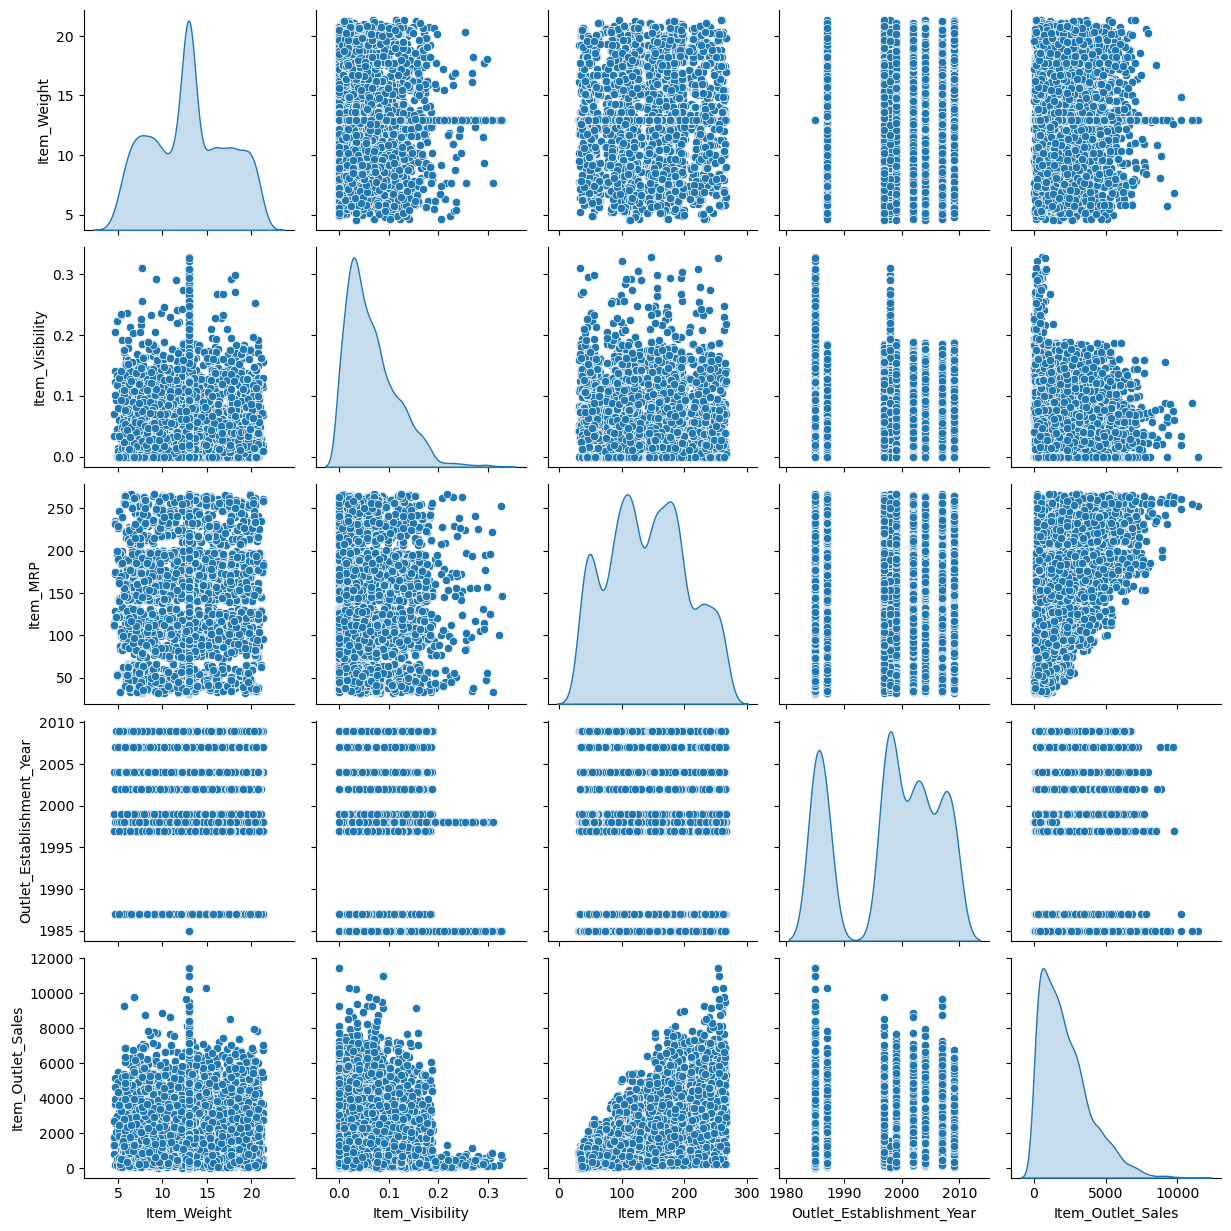

In [114]:
import seaborn as sns
sns.pairplot(df, diag_kind='kde')


In [88]:
# normalizing the data Item_Weight, Item_Visibility, Item_MRP, Outlet_Establishment_Year
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_sub[['Item_Weight', 'Item_Visibility', 'Item_MRP']] = scaler.fit_transform(df_sub[['Item_Weight', 'Item_Visibility', 'Item_MRP']])
df_sub.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0.282525,0,0.048866,4,0.927507,9,1,0,1,3735.1380
1,0.081274,1,0.058705,14,0.072068,3,1,2,2,443.4228
2,0.770765,0,0.051037,10,0.468288,9,1,0,1,2097.2700
3,0.871986,1,0.000000,6,0.640093,0,1,2,0,732.3800
4,0.260494,0,0.000000,9,0.095805,1,0,2,1,994.7052


In [115]:
df_sub.Outlet_Type.unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [116]:
# get specific column of the df_sub by index
df_sub.iloc[:,1]



0       Low Fat
1       Regular
2       Low Fat
3       Regular
4       Low Fat
         ...   
4995    Regular
4996    Low Fat
4997    Regular
4998    Regular
4999    Regular
Name: Item_Fat_Content, Length: 5000, dtype: object

In [117]:
from sklearn import preprocessing
la_fat = preprocessing.LabelEncoder()
la_fat.fit(['Low Fat','Regular'])
df_sub.iloc[:,1] = la_fat.transform(df_sub.iloc[:,1]) 

la_type = preprocessing.LabelEncoder()
la_type.fit([ 'Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'])
df_sub.iloc[:,3] = la_type.transform(df_sub.iloc[:,3])


la_idOutlet = preprocessing.LabelEncoder()
la_idOutlet.fit(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'])
df_sub.iloc[:,5] = la_idOutlet.transform(df_sub.iloc[:,5]) 

la_size = preprocessing.LabelEncoder()
la_size.fit(['Medium', 'High', 'Small'])
df_sub.iloc[:,6] = la_size.transform(df_sub.iloc[:,6]) 

la_loc = preprocessing.LabelEncoder()
la_loc.fit(['Tier 1', 'Tier 3', 'Tier 2'])
df_sub.iloc[:,7] = la_loc.transform(df_sub.iloc[:,7]) 

la_typeOut = preprocessing.LabelEncoder()
la_typeOut.fit(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'])
df_sub.iloc[:,8] = la_typeOut.transform(df_sub.iloc[:,8]) 



/var/folders/jw/pk9yd5v978d_6j_wky4ptw480000gn/T/ipykernel_88663/3775872684.py:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_sub.iloc[:,1] = la_fat.transform(df_sub.iloc[:,1])
/var/folders/jw/pk9yd5v978d_6j_wky4ptw480000gn/T/ipykernel_88663/3775872684.py:11: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_sub.iloc[:,3] = la_type.transform(df_sub.iloc[:,3])
/var/folders/jw/pk9yd5v978d_6j_wky4ptw480000gn/T/ipykernel_88663/3775872684.py:17: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values

In [118]:
df_sub.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0,0.016047,4,249.8092,9,1,0,1,3735.1380
1,5.92,1,0.019278,14,48.2692,3,1,2,2,443.4228
2,17.50,0,0.016760,10,141.6180,9,1,0,1,2097.2700
3,19.20,1,0.000000,6,182.0950,0,1,2,0,732.3800
4,8.93,0,0.000000,9,53.8614,1,0,2,1,994.7052


In [123]:
# normalizing the data Item_Weight, Item_Visibility, Item_MRP, Outlet_Establishment_Year
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_sub.drop(['Item_Outlet_Sales'], axis=1))
df_scaled

array([[0.28252456, 0.        , 0.04886645, ..., 0.5       , 0.        ,
        0.33333333],
       [0.08127419, 1.        , 0.05870508, ..., 0.5       , 1.        ,
        0.66666667],
       [0.77076511, 0.        , 0.05103696, ..., 0.5       , 0.        ,
        0.33333333],
       ...,
       [0.65168205, 1.        , 0.38429779, ..., 0.5       , 1.        ,
        0.66666667],
       [0.72313188, 1.        , 0.36378051, ..., 1.        , 0.        ,
        0.33333333],
       [0.30038702, 1.        , 0.08360461, ..., 0.5       , 1.        ,
        0.66666667]])

In [124]:
# X = pd.get_dummies(df_sub.drop(['Item_Outlet_Sales'], axis=1))
X = df_scaled
y = df_sub['Item_Outlet_Sales']

In [125]:
X.shape, y.shape

((5000, 9), (5000,))

In [126]:
# Creating training and validation set

# stratify will make sure that the distribution of classes in train and validation set it similar
# random state to regenerate the same train and validation set
# test size 0.2 will keep 20% data in validation and remaining 80% in train set

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

# shape of training and validation set
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((4000, 9), (4000,)), ((1000, 9), (1000,)))

In [127]:
# importing the sequential model
from keras.models import Sequential

# importing different layers from keras
from keras.layers import InputLayer, Dense, Dropout

In [128]:
# number of input neurons
X_train.shape

(4000, 9)

In [129]:
# number of features in the data
X_train.shape[1]

9

In [130]:
# defining input neurons
input_neurons = X_train.shape[1]
input_neurons

9

In [131]:
# define number of output neurons
output_neurons = 1

In [139]:
# define hidden layers and neuron in each layer
neuron_hidden_layer_1 = 60
neuron_hidden_layer_2 = 30
neuron_hidden_layer_3 = 15
# neuron_hidden_layer_4 = 15
# neuron_hidden_layer_5 = 10
# neuron_hidden_layer_6 = 5
# neuron_hidden_layer_7 = 2

In [152]:
from keras.optimizers import Adam
# defining the architecture of the model
# Define the model
model = Sequential()

model.add(InputLayer(input_shape=(input_neurons)))
model.add(Dense(units=neuron_hidden_layer_1, activation='relu'))
model.add(Dense(units=neuron_hidden_layer_2, activation='relu'))
model.add(Dropout(0.1))
# model.add(Dense(units=neuron_hidden_layer_3, activation='relu'))
# model.add(Dense(units=neuron_hidden_layer_4, activation='relu'))
# model.add(Dense(units=neuron_hidden_layer_5, activation='relu'))
# model.add(Dense(units=neuron_hidden_layer_6, activation='relu'))
# model.add(Dense(units=neuron_hidden_layer_7, activation='relu'))
model.add(Dense(units=output_neurons, activation='linear'))

# Compile the model
model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001), metrics=['mse'])

# Print the model summary
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 60)                600       
                                                                 
 dense_20 (Dense)            (None, 30)                1830      
                                                                 
 dropout_3 (Dropout)         (None, 30)                0         
                                                                 
 dense_21 (Dense)            (None, 1)                 31        
                                                                 
Total params: 2461 (9.61 KB)
Trainable params: 2461 (9.61 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [159]:
# training the model

# passing the independent and dependent features for training set for training the model

# validation data will be evaluated at the end of each epoch

# setting the epochs as 50

# storing the trained model in model_history variable which will be used to visualize the training process

model_history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=800, batch_size=8)

Epoch 1/1400
500/500 [==============================] - 1s 1ms/step - loss: 1217676.8750 - mse: 1217676.8750 - val_loss: 1129676.5000 - val_mse: 1129676.5000
Epoch 2/1400
500/500 [==============================] - 1s 1ms/step - loss: 1187827.1250 - mse: 1187827.1250 - val_loss: 1140890.1250 - val_mse: 1140890.1250
Epoch 3/1400
500/500 [==============================] - 1s 1ms/step - loss: 1196241.8750 - mse: 1196241.8750 - val_loss: 1130776.2500 - val_mse: 1130776.2500
Epoch 4/1400
500/500 [==============================] - 1s 1ms/step - loss: 1198174.3750 - mse: 1198174.3750 - val_loss: 1128271.3750 - val_mse: 1128271.3750
Epoch 5/1400
500/500 [==============================] - 1s 1ms/step - loss: 1194809.2500 - mse: 1194809.2500 - val_loss: 1132022.3750 - val_mse: 1132022.3750
Epoch 6/1400
500/500 [==============================] - 1s 1ms/step - loss: 1193356.3750 - mse: 1193356.3750 - val_loss: 1130692.7500 - val_mse: 1130692.7500
Epoch 7/1400
500/500 [==============================

In [160]:
# Evaluate the model
loss, mse = model.evaluate(X_test, y_test)

32/32 [==============================] - 0s 1ms/step - loss: 1138676.3750 - mse: 1138676.3750


In [162]:
from sklearn.metrics import r2_score

# Make predictions
y_pred = model.predict(X_test)

# Calculate R2 score
r2 = r2_score(y_test, y_pred)
print(f'R2 Score: {r2}')


32/32 [==============================] - 0s 936us/step
R2 Score: 0.6055869777012528


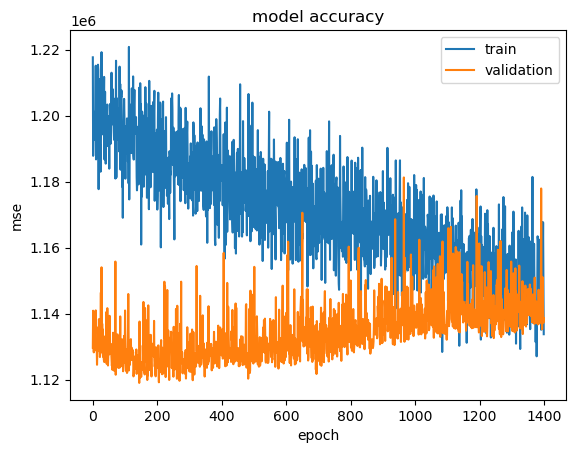

In [163]:
# summarize history for loss
plt.plot(model_history.history['mse'])
plt.plot(model_history.history['val_mse'])
plt.title('model accuracy')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [48]:
# 0.605356359282686

In [167]:
def createModel(inputNeurons, outputNeurons, numHiddLayers, numNeurons, learningRate):
    model = Sequential()
    model.add(InputLayer(input_shape=(inputNeurons)))
    for i in range(numHiddLayers):
        model.add(Dense(units=numNeurons, activation='relu'))
    model.add(Dense(units=outputNeurons, activation='linear'))
    model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=learningRate), metrics=['mse'])
    return model

def createLogEntry(inputNeurons, outputNeurons, numHiddLayers, numNeurons, learningRate, r2Score, mse, loss):
    logEntry = pd.DataFrame([[inputNeurons, outputNeurons, numHiddLayers, numNeurons, learningRate, r2Score, mse, loss]], columns=['inputNeurons', 'outputNeurons', 'numHiddLayers', 'numNeurons', 'learningRate', 'r2Score', 'mse', 'loss'])
    # save the log entry to csv with header
    logEntry.to_csv('../data/log.csv', index=False, header=True, mode='a')
    return logEntry

def fitModel(model, X_train, y_train, X_test, y_test, epochs, batchSize):
    model_history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batchSize)
    return model_history

def evaluateModel(model, X_test, y_test):
    loss, mse = model.evaluate(X_test, y_test)
    return loss, mse

def predictModel(model, X_test):
    y_pred = model.predict(X_test)
    return y_pred

def calculateR2Score(y_test, y_pred):
    r2 = r2_score(y_test, y_pred)
    return r2

def plotModelHistory(model_history):
    # summarize history for loss
    plt.plot(model_history.history['mse'])
    plt.plot(model_history.history['val_mse'])
    plt.title('model accuracy')
    plt.ylabel('mse')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper right')
    plt.show()

def runModel(inputNeurons, outputNeurons, numHiddLayers, numNeurons, learningRate, epochs, batchSize):
    model = createModel(inputNeurons, outputNeurons, numHiddLayers, numNeurons, learningRate)
    model_history = fitModel(model, X_train, y_train, X_test, y_test, epochs, batchSize)
    loss, mse = evaluateModel(model, X_test, y_test)
    y_pred = predictModel(model, X_test)
    r2Score = calculateR2Score(y_test, y_pred)
    plotModelHistory(model_history)
    return createLogEntry(inputNeurons, outputNeurons, numHiddLayers, numNeurons, learningRate, r2Score, mse, loss)



Epoch 1/50
125/125 [==============================] - 1s 2ms/step - loss: 7076590.5000 - mse: 7076590.5000 - val_loss: 4475935.5000 - val_mse: 4475935.5000
Epoch 2/50
125/125 [==============================] - 0s 2ms/step - loss: 2791549.2500 - mse: 2791549.2500 - val_loss: 2445955.5000 - val_mse: 2445955.5000
Epoch 3/50
125/125 [==============================] - 0s 2ms/step - loss: 2382462.2500 - mse: 2382462.2500 - val_loss: 2274727.5000 - val_mse: 2274727.5000
Epoch 4/50
125/125 [==============================] - 0s 1ms/step - loss: 2188683.2500 - mse: 2188683.2500 - val_loss: 2060008.2500 - val_mse: 2060008.2500
Epoch 5/50
125/125 [==============================] - 0s 2ms/step - loss: 1968506.6250 - mse: 1968506.6250 - val_loss: 1827794.7500 - val_mse: 1827794.7500
Epoch 6/50
125/125 [==============================] - 0s 1ms/step - loss: 1747635.2500 - mse: 1747635.2500 - val_loss: 1610419.3750 - val_mse: 1610419.3750
Epoch 7/50
125/125 [==============================] - 0s 1ms/ste

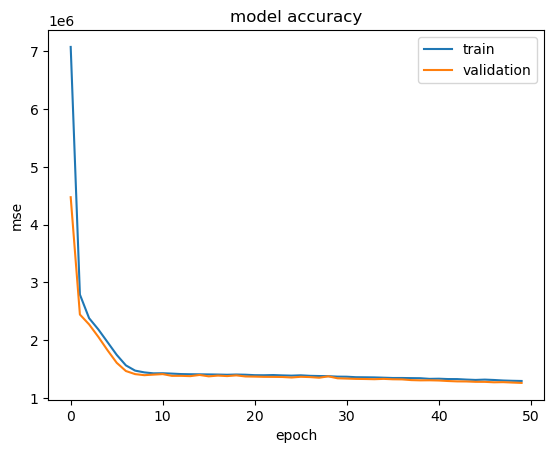

,inputNeurons,outputNeurons,numHiddLayers,numNeurons,learningRate,r2Score,mse,loss
0,9,1,3,60,0.001,0.562842,1262083.125,1262083.125


In [168]:
runModel(inputNeurons=X_train.shape[1], outputNeurons=1, numHiddLayers=3, numNeurons=60, learningRate=0.001, epochs=50, batchSize=32)